### LLM Sequential Workflow Example
This notebook demonstrates how to use LangGraph and Cohere LLM to build a simple sequential workflow for question answering.

In [ ]:
# Import required libraries and set up Cohere API key
from langchain_cohere import ChatCohere
from dotenv import load_dotenv
import os

load_dotenv()
cohere_api_key = os.getenv("COHERE_API_KEY")

In [ ]:
# Test the Cohere LLM API with a sample prompt
llm = ChatCohere(model="command-a-03-2025")
llm.invoke("What is the value of pi in decimal upto 3 decimal places?")

AIMessage(content='The value of pi (π) up to 3 decimal places is **3.142**.', additional_kwargs={'id': '9dd39dae-0014-4c84-9f2b-d420b047e37c', 'finish_reason': 'COMPLETE', 'content': 'The value of pi (π) up to 3 decimal places is **3.142**.', 'token_count': {'input_tokens': 509.0, 'output_tokens': 24.0}}, response_metadata={'id': '9dd39dae-0014-4c84-9f2b-d420b047e37c', 'finish_reason': 'COMPLETE', 'content': 'The value of pi (π) up to 3 decimal places is **3.142**.', 'token_count': {'input_tokens': 509.0, 'output_tokens': 24.0}}, id='lc_run--35490f88-ece6-4150-bc44-ce35502466a4-0', usage_metadata={'input_tokens': 509, 'output_tokens': 24, 'total_tokens': 533})

In [ ]:
# Import LangGraph classes and typing for workflow definition
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [ ]:
# Initialize the LLM model for use in the workflow
model = ChatCohere(model="command-a-03-2025")

In [ ]:
# Define the state structure for the LLM workflow
class LLMstate(TypedDict):
    question: str   # The input question
    answer: str    # The answer generated by the LLM

In [ ]:
# Node function to get an answer from the LLM for a given question
def llm_get_QA(state: LLMstate) -> LLMstate:
    question = state["question"]
    prompt = f"Answer the question: {question}"
    result = model.invoke(prompt).content
    state["answer"] = result
    return state

In [ ]:
# Create and compile the workflow graph for LLM question answering
graph = StateGraph(LLMstate)

# Add nodes to the graph
graph.add_node("llm_get_QA", llm_get_QA)

# Add edges to the graph
graph.add_edge(START, "llm_get_QA")
graph.add_edge("llm_get_QA", END)
workflow = graph.compile()

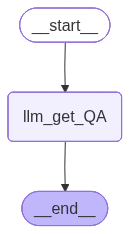

In [7]:
# (Optional) Compile the graph again if needed (already compiled above)
graph.compile()

In [ ]:
# Prepare an initial state and run the workflow to get an answer
initial_state: LLMstate = {
    "question": "What is the value of pi in decimal upto 3 decimal places?",
    "answer": ""
}
result = workflow.invoke(initial_state)

In [9]:
# Print the answer generated by the workflow
print(result["answer"])

The value of pi (π) up to 3 decimal places is **3.142**.
